# Pandas

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features. In this section of the course, you should go through the notebooks in this order:

* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Operations
* Data Input and Output

In [1]:
import pandas as pd
import numpy as np

## DataFrame Slicing

In [2]:
s1 = np.random.randint(10,size = 5)
s2 = np.random.randint(10,size = 5)
s3 = np.random.randint(10,size = 5)

In [4]:
dic1 = {"var1":s1, "var2":s2, "var3":s3}
dic1

{'var1': array([4, 0, 3, 1, 1]),
 'var2': array([1, 8, 8, 5, 7]),
 'var3': array([1, 5, 3, 5, 9])}

In [5]:
df = pd.DataFrame(dic1)
df

,var1,var2,var3
0,4,1,1
1,0,8,5
2,3,8,3
3,1,5,5
4,1,7,9


In [6]:
df[0:1]

,var1,var2,var3
0,4,1,1


In [7]:
df[0:2]

,var1,var2,var3
0,4,1,1
1,0,8,5


In [8]:
df.index = ["a","b","c","d","e"]
df

,var1,var2,var3
a,4,1,1
b,0,8,5
c,3,8,3
d,1,5,5
e,1,7,9


In [9]:
df["c":"e"]

,var1,var2,var3
c,3,8,3
d,1,5,5
e,1,7,9


## Remove and Add rows or columns

In [10]:
df.drop("a", axis = 0)

,var1,var2,var3
b,0,8,5
c,3,8,3
d,1,5,5
e,1,7,9


In [11]:
df

,var1,var2,var3
a,4,1,1
b,0,8,5
c,3,8,3
d,1,5,5
e,1,7,9


In [12]:
#inplace = If we make it true, the drop will be done permanently.
df.drop("a", axis = 0, inplace = True)

In [13]:
df['new'] = df['var1'] + df['var2']

In [14]:
df

,var1,var2,var3,new
b,0,8,5,8
c,3,8,3,11
d,1,5,5,6
e,1,7,9,8


In [15]:
l = {"c","e"}
df.drop(l, axis = 0)

,var1,var2,var3,new
b,0,8,5,8
d,1,5,5,6


In [16]:
"var1" in df

True

In [18]:
l = ["var1","a","var2"]
for i in l:
    print(i in df)

True
False
True


### Removing Columns

In [19]:
l = ["var1","var2"]
df.drop(l, axis = 1)

,var3,new
b,5,8
c,3,11
d,5,6
e,9,8


In [20]:
df

,var1,var2,var3,new
b,0,8,5,8
c,3,8,3,11
d,1,5,5,6
e,1,7,9,8


# loc & iloc

In [22]:
m = np.random.randint(1,30, size = (10,3))
df = pd.DataFrame(m, columns=["var1","var2","var3"])
df

,var1,var2,var3
0,10,4,26
1,3,12,3
2,22,4,14
3,28,16,27
4,21,13,26
5,14,10,3
6,3,15,17
7,3,6,6
8,6,26,11
9,13,29,14


### difference of loc and iloc

In [23]:
df.loc[0:3]

,var1,var2,var3
0,10,4,26
1,3,12,3
2,22,4,14
3,28,16,27


In [24]:
df.iloc[0:3]

,var1,var2,var3
0,10,4,26
1,3,12,3
2,22,4,14


In [25]:
df.iloc[0,0]

10

In [26]:
df.iloc[:3,:2]

,var1,var2
0,10,4
1,3,12
2,22,4


In [29]:
df.loc[0:3,"var3"] 

0    26
1     3
2    14
3    27
Name: var3, dtype: int32

In [30]:
df.iloc[0:3]["var3"]

0    26
1     3
2    14
Name: var3, dtype: int32

In [31]:
df[0:2]

,var1,var2,var3
0,10,4,26
1,3,12,3


In [32]:
df.iloc[0:2]

,var1,var2,var3
0,10,4,26
1,3,12,3


In [33]:
df.loc[0:2]

,var1,var2,var3
0,10,4,26
1,3,12,3
2,22,4,14


In [34]:
df.iloc[:,:2]

,var1,var2
0,10,4
1,3,12
2,22,4
3,28,16
4,21,13
5,14,10
6,3,15
7,3,6
8,6,26
9,13,29


In [35]:
df.iloc[:,0]

0    10
1     3
2    22
3    28
4    21
5    14
6     3
7     3
8     6
9    13
Name: var1, dtype: int32

In [36]:
df.loc[0:3,"var3"]

0    26
1     3
2    14
3    27
Name: var3, dtype: int32

In [37]:
df.iloc[0:3]["var3"]

0    26
1     3
2    14
Name: var3, dtype: int32

In [38]:
df[0:2][["var1","var2"]]

,var1,var2
0,10,4
1,3,12


# Conditional Operations

In [39]:
df.var1 > 15

0    False
1    False
2     True
3     True
4     True
5    False
6    False
7    False
8    False
9    False
Name: var1, dtype: bool

In [40]:
df[df.var1 > 15]["var2"]

2     4
3    16
4    13
Name: var2, dtype: int32

For two conditions you can use | and & with parenthesis:

In [41]:
df[(df.var1 >10) | (df.var3 < 8)]

,var1,var2,var3
1,3,12,3
2,22,4,14
3,28,16,27
4,21,13,26
5,14,10,3
7,3,6,6
9,13,29,14


In [42]:
df.loc[(df.var1 >10),["var1","var2"]]

,var1,var2
2,22,4
3,28,16
4,21,13
5,14,10
9,13,29


In [43]:
df[(df.var1 >10)][["var1","var2"]]

,var1,var2
2,22,4
3,28,16
4,21,13
5,14,10
9,13,29


Write a Pandas program to select the rows the score is between 15 and 20 (inclusive).

# Join

In [44]:
import numpy as np
import pandas as pd


m = np.random.randint(1,30, size = (10,3))
df1 = pd.DataFrame(m, columns=["var1","var2","var3"])
df1

,var1,var2,var3
0,28,6,5
1,29,20,29
2,15,7,24
3,24,26,19
4,2,12,17
5,29,11,19
6,26,11,27
7,20,20,16
8,23,5,9
9,14,6,16


In [45]:
df2 = df1 + 99
df2

,var1,var2,var3
0,127,105,104
1,128,119,128
2,114,106,123
3,123,125,118
4,101,111,116
5,128,110,118
6,125,110,126
7,119,119,115
8,122,104,108
9,113,105,115


In [46]:
pd.concat([df1,df2])

,var1,var2,var3
0,28,6,5
1,29,20,29
2,15,7,24
3,24,26,19
4,2,12,17
5,29,11,19
6,26,11,27
7,20,20,16
8,23,5,9
9,14,6,16


In [47]:
pd.concat([df1,df2], ignore_index=True)

,var1,var2,var3
0,28,6,5
1,29,20,29
2,15,7,24
3,24,26,19
4,2,12,17
5,29,11,19
6,26,11,27
7,20,20,16
8,23,5,9
9,14,6,16


In [48]:
df1.columns

Index(['var1', 'var2', 'var3'], dtype='object')

In [49]:
df2.columns = ["var1","var2","deg3"]
df2

,var1,var2,deg3
0,127,105,104
1,128,119,128
2,114,106,123
3,123,125,118
4,101,111,116
5,128,110,118
6,125,110,126
7,119,119,115
8,122,104,108
9,113,105,115


In [50]:
df1

,var1,var2,var3
0,28,6,5
1,29,20,29
2,15,7,24
3,24,26,19
4,2,12,17
5,29,11,19
6,26,11,27
7,20,20,16
8,23,5,9
9,14,6,16


In [51]:
df2

,var1,var2,deg3
0,127,105,104
1,128,119,128
2,114,106,123
3,123,125,118
4,101,111,116
5,128,110,118
6,125,110,126
7,119,119,115
8,122,104,108
9,113,105,115


In [52]:
pd.concat([df1,df2])

,var1,var2,var3,deg3
0,28,6,5.0,NaN
1,29,20,29.0,NaN
2,15,7,24.0,NaN
3,24,26,19.0,NaN
4,2,12,17.0,NaN
5,29,11,19.0,NaN
6,26,11,27.0,NaN
7,20,20,16.0,NaN
8,23,5,9.0,NaN
9,14,6,16.0,NaN


In [53]:
pd.concat([df1,df2], join="inner", ignore_index=True)

,var1,var2
0,28,6
1,29,20
2,15,7
3,24,26
4,2,12
5,29,11
6,26,11
7,20,20
8,23,5
9,14,6


In [54]:
pd.concat([df1,df2], axis=1, ignore_index= True)

,0,1,2,3,4,5
0,28,6,5,127,105,104
1,29,20,29,128,119,128
2,15,7,24,114,106,123
3,24,26,19,123,125,118
4,2,12,17,101,111,116
5,29,11,19,128,110,118
6,26,11,27,125,110,126
7,20,20,16,119,119,115
8,23,5,9,122,104,108
9,14,6,16,113,105,115


In [55]:
df1.columns

Index(['var1', 'var2', 'var3'], dtype='object')

In [56]:
df2.columns

Index(['var1', 'var2', 'deg3'], dtype='object')

In [57]:
import pandas as pd

df1 = pd.DataFrame({'Worker':['John','Doe','Mehmet','Jeff'],
                    'Positions':['HR','Engineering','AI','Accounting']
                   })
df1

,Worker,Positions
0,John,HR
1,Doe,Engineering
2,Mehmet,AI
3,Jeff,Accounting


In [58]:
df2 = pd.DataFrame({'Worker':['John','Doe','Mehmet','Jeff'],
                   
                    'Date_Of_starting_work':[2012,'2018','2015','2017']
                   })
df2

,Worker,Date_Of_starting_work
0,John,2012
1,Doe,2018
2,Mehmet,2015
3,Jeff,2017


## Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [59]:
pd.merge(df1,df2) #how='inner', 'outer', 'right', 'left'

,Worker,Positions,Date_Of_starting_work
0,John,HR,2012
1,Doe,Engineering,2018
2,Mehmet,AI,2015
3,Jeff,Accounting,2017


In [60]:
#many to one
df3 = pd.merge(df1,df2, on = "Worker")
df3

,Worker,Positions,Date_Of_starting_work
0,John,HR,2012
1,Doe,Engineering,2018
2,Mehmet,AI,2015
3,Jeff,Accounting,2017


In [61]:
df4 = pd.DataFrame({'Positions':['Accounting',"Engineering",'HR'],
                    'Manager': ['Maryam','Minoo','Ahmad']})
pd.merge(df3,df4)

,Worker,Positions,Date_Of_starting_work,Manager
0,John,HR,2012,Ahmad
1,Doe,Engineering,2018,Minoo
2,Jeff,Accounting,2017,Maryam


In [62]:
#many to many
df5 = pd.DataFrame({'Positions':['Accounting','Accounting',"Engineering","Engineering",'HR','HR'],
                    'Ability': ['Math','Excel','Coding','Linux','Excel','Management']})
    
df5

,Positions,Ability
0,Accounting,Math
1,Accounting,Excel
2,Engineering,Coding
3,Engineering,Linux
4,HR,Excel
5,HR,Management


In [63]:
df1

,Worker,Positions
0,John,HR
1,Doe,Engineering
2,Mehmet,AI
3,Jeff,Accounting


In [64]:
pd.merge(df1,df5)

,Worker,Positions,Ability
0,John,HR,Excel
1,John,HR,Management
2,Doe,Engineering,Coding
3,Doe,Engineering,Linux
4,Jeff,Accounting,Math
5,Jeff,Accounting,Excel


## Joining
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [65]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [66]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# Aggregation & Grouping


* count()
* first()
* last()
* mean()
* median()
* min()
* max()
* std()
* var()
* sum()

In [67]:
import seaborn as sns

In [68]:
df = sns.load_dataset("planets")
df.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [69]:
df.shape

(1035, 6)

In [70]:
df.mean()

C:\Users\ParsArgham\AppData\Local\Temp\ipykernel_15824\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64

In [71]:
df["mass"]

0        7.10
1        2.21
2        2.60
3       19.40
4       10.50
        ...  
1030      NaN
1031      NaN
1032      NaN
1033      NaN
1034      NaN
Name: mass, Length: 1035, dtype: float64

In [72]:
df['mass'].mean()

2.6381605847953233

In [73]:
df["mass"].count()

513

In [74]:
df["mass"].min()

0.0036

In [75]:
df["mass"].max()

25.0

In [76]:
df["mass"].sum()

1353.37638

In [77]:
df["mass"].std()

3.8186166509616046

In [78]:
#variance
df["mass"].var()

14.58183312700122

In [79]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [81]:
#missing value
df.dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
number,498.0,1.734940,1.175720,1.0000,1.00000,1.000,2.0000,6.0
orbital_period,498.0,835.778671,1469.128259,1.3283,38.27225,357.000,999.6000,17337.5
mass,498.0,2.509320,3.636274,0.0036,0.21250,1.245,2.8675,25.0
distance,498.0,52.068213,46.596041,1.3500,24.49750,39.940,59.3325,354.0
year,498.0,2007.377510,4.167284,1989.0000,2005.00000,2009.000,2011.0000,2014.0


## Missing Value

In [82]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [83]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [84]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [85]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [86]:
df.fillna(value='FILL VALUE')#df.fillna(method='ffill')
# 'pad', bfill/backfill

,A,B,C
0,1.0,5.0,1
1,2.0,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [87]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# GroupBy

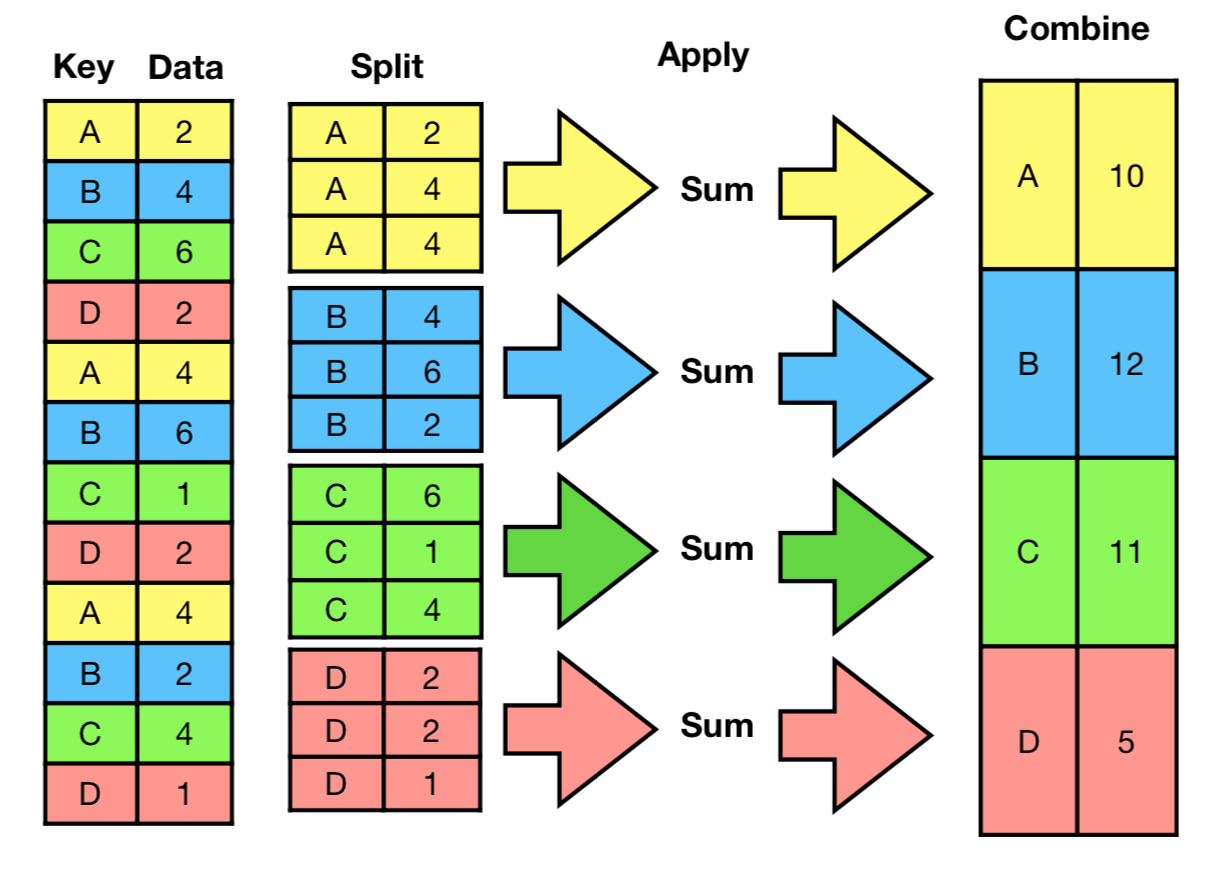

In [88]:
df = pd.DataFrame({'groups': ['A','B','C','A','B','C'],
                   'value': [10,11,52,23,43,55]}, columns = ['groups','value'])
df

,groups,value
0,A,10
1,B,11
2,C,52
3,A,23
4,B,43
5,C,55


In [89]:
df.groupby("groups")

In [90]:
df.groupby("groups").mean()

,value
groups,
A,16.5
B,27.0
C,53.5


In [91]:
df.groupby("groups").sum() # .std(), .min(),.max(), .count()

,value
groups,
A,33
B,54
C,107


In [92]:
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [93]:
df.groupby("method").count()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


In [95]:
df.groupby("method")["mass"].mean()

method
Astrometry                            NaN
Eclipse Timing Variations        5.125000
Imaging                               NaN
Microlensing                          NaN
Orbital Brightness Modulation         NaN
Pulsar Timing                         NaN
Pulsation Timing Variations           NaN
Radial Velocity                  2.630699
Transit                          1.470000
Transit Timing Variations             NaN
Name: mass, dtype: float64

In [96]:
df.groupby("method")["orbital_period"].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


# Aggregation

In [97]:
df = pd.DataFrame({'groups': ['A','B','C','A','B','C'],
                   'numbers': [10,23,33,22,11,99],
                   'col 2':[100,253,333,262,111,969]},
                  columns = ['groups','numbers','col 2'])
df

,groups,numbers,col 2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [99]:
df.groupby('groups').aggregate([min, np.median, max])

numbers            col 2            
           min median max   min median  max
groups                                     
A           10   16.0  22   100  181.0  262
B           11   17.0  23   111  182.0  253
C           33   66.0  99   333  651.0  969

In [100]:
df.groupby('groups').aggregate({"numbers":"min","col 2": "max"})

,numbers,col 2
groups,,
A,10,262
B,11,253
C,33,969


### filter 

In [101]:
def filter_func(x):
    return x["numbers"].std() > 9

In [102]:
df.groupby("groups").std()

,numbers,col 2
groups,,
A,8.485281,114.551299
B,8.485281,100.409163
C,46.669048,449.719913


In [103]:
df.groupby("groups").filter(filter_func)

,groups,numbers,col 2
2,C,33,333
5,C,99,969


### Transform

In [105]:
df_a = df.iloc[:,1:3]
df_a

,numbers,col 2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969


In [106]:
df_a.transform(lambda x : x - x.mean())

,numbers,col 2
0,-23.0,-238.0
1,-10.0,-85.0
2,0.0,-5.0
3,-11.0,-76.0
4,-22.0,-227.0
5,66.0,631.0


In [107]:
df_a.transform(lambda x : (x - x.mean()) / x.std())

,numbers,col 2
0,-0.687871,-0.738461
1,-0.299074,-0.263736
2,0.000000,-0.015514
3,-0.328982,-0.235811
4,-0.657963,-0.704331
5,1.973890,1.957853


### Apply

In [108]:
data = {'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8],
        'C': [9, 10, 11, 12]}

df1 = pd.DataFrame(data)
print(df)

  groups  numbers  col 2
0      A       10    100
1      B       23    253
2      C       33    333
3      A       22    262
4      B       11    111
5      C       99    969


In [109]:
df1.apply(np.sum)

A    10
B    26
C    42
dtype: int64

In [110]:
df1.apply(np.mean)

A     2.5
B     6.5
C    10.5
dtype: float64

In [111]:
df1.groupby("A").apply(np.sum)

,A,B,C
A,,,
1,1,5,9
2,2,6,10
3,3,7,11
4,4,8,12


In [112]:
df1.groupby("A").apply(np.mean)

C:\Users\ParsArgham\anaconda3\envs\notebook\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,A,B,C
A,,,
1,1.0,5.0,9.0
2,2.0,6.0,10.0
3,3.0,7.0,11.0
4,4.0,8.0,12.0


# Pivot Table

In [113]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [114]:
titanic.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [115]:
titanic.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


In [117]:
titanic.groupby(["sex","class"])[["survived"]].aggregate("mean")

survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [116]:
titanic.groupby(["sex","class"])[["survived"]].aggregate("mean").unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [118]:
titanic.pivot_table("survived", index = "sex", columns = "class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Multi-Index and Index Hierarchy


In [123]:
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [124]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  1.814357  0.452376
   2 -0.036422 -0.329793
   3 -0.771622 -1.657704
G2 1  0.069831 -0.815381
   2  1.239289  0.834750
   3  1.308617 -0.530246

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [125]:
df.loc['G1']

,A,B
1,1.814357,0.452376
2,-0.036422,-0.329793
3,-0.771622,-1.657704


In [126]:
df.loc['G1'].loc[1]

A    1.814357
B    0.452376
Name: 1, dtype: float64

In [127]:
df.index.names

FrozenList([None, None])

In [128]:
df.index.names = ['Group','Num']
df

A         B
Group Num                    
G1    1    1.814357  0.452376
      2   -0.036422 -0.329793
      3   -0.771622 -1.657704
G2    1    0.069831 -0.815381
      2    1.239289  0.834750
      3    1.308617 -0.530246

In [129]:
df.xs('G1')

,A,B
Num,,
1,1.814357,0.452376
2,-0.036422,-0.329793
3,-0.771622,-1.657704


In [130]:
df.xs(['G1',1])

C:\Users\ParsArgham\AppData\Local\Temp\ipykernel_15824\580597333.py:1: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df.xs(['G1',1])


A    1.814357
B    0.452376
Name: (G1, 1), dtype: float64

In [131]:
df.xs(1,level='Num')

,A,B
Group,,
G1,1.814357,0.452376
G2,0.069831,-0.815381


# Data Input and Output


## CSV

### CSV Input

In [130]:
df = pd.read_csv('example')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


### CSV Output

In [131]:
df.to_csv('example',index=False)

## Excel
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash. 

In [5]:
df = pd.read_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

In [6]:
df

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [7]:
df.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

## HTML

You may need to install htmllib5,lxml, and BeautifulSoup4. In your terminal/command prompt run:

    conda install lxml
    conda install html5lib
    conda install BeautifulSoup4

Then restart Jupyter Notebook.
(or use pip install if you aren't using the Anaconda Distribution)

Pandas can read table tabs off of html. For example:

In [3]:
df = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')
df[0]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,"November 3, 2023",10545
1,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.","July 28, 2023",10544
2,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.","May 1, 2023",10543
3,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540
4,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,"March 10, 2023",10539
...,...,...,...,...,...,...,...
563,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
564,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
565,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
566,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646
